<a href="https://colab.research.google.com/github/viplavsingh/EVA-project1/blob/master/EVA_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

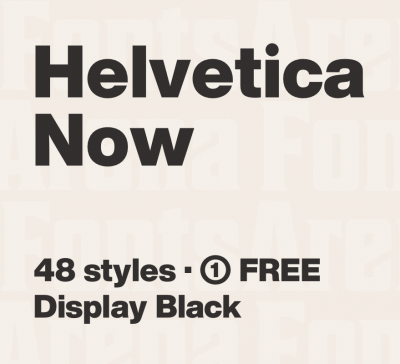

In [3]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
edges = cv2.Canny(image,100,200)

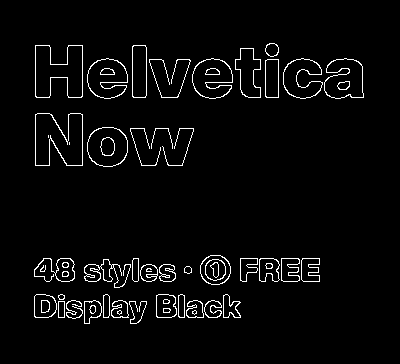

In [5]:
cv2_imshow(edges)

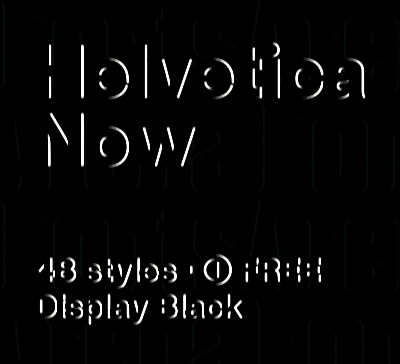

In [6]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

**Horizontal Edge Detector**

1.   A kernel with top row as dark pixel and bottom row as bright pixels or vice versa will give horizontal edge detector after convolution.
2.  In this case edges are thick as compared to the edges in the image. 



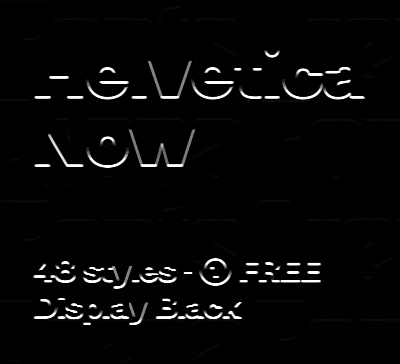

In [7]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,-1,-1],[0,0,0],[1,1,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

A kernel with values [-1,-1,-1],[2,2,2],[-1,-1,-1] can also give horizontal edge detection. In this case, edges will be thin as compared to above case

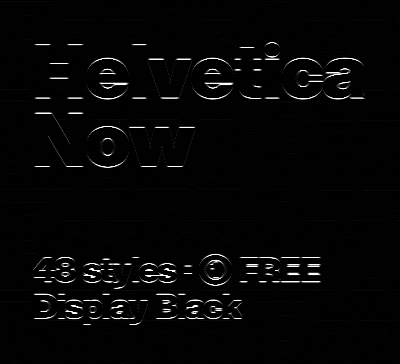

In [47]:
#kernel = np.ones((3,3),np.float32)/25
#kernel = np.float32([[1,1,1],[0,0,0],[-1,-1,-1]])
kernel = np.float32([[-1,-1,-1],[2,2,2],[-1,-1,-1]])
#kernel = np.float32([[-2,-2,-2],[1,1,1],[-2,-2,-2]])
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

**45 Degree Angle Detector**
[-1,-1,2],[-1,2,-1],[2,-1,-1] kernel values can give a 45 degree angle detector.

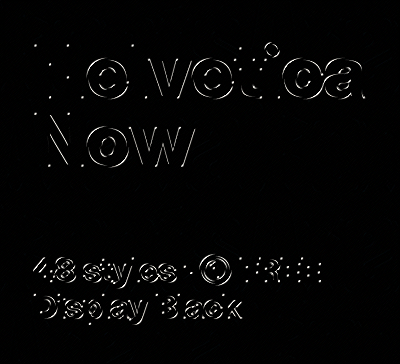

In [22]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,-1,2],[-1,2,-1],[2,-1,-1]])

dst = cv2.filter2D(image,-1,kernel)
#cv2_imshow(dst)
#kernel = np.float32([[-1,2,-1],[-1,2,-1],[-1,2,-1]])

#dst = cv2.filter2D(dst,-1,kernel)
cv2_imshow(dst)


A combination of horizontal and vertical edge detector can give a 45 degree angle detector.

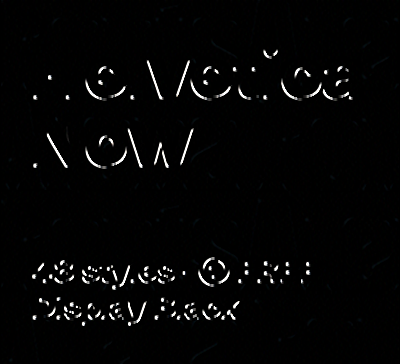

In [23]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,-1,-1],[0,0,0],[1,1,1]])

dst = cv2.filter2D(image,-1,kernel)
#cv2_imshow(dst)
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(dst,-1,kernel)
cv2_imshow(dst)


**Blur kernel**

A weighted sum of element wise multiplication of kernel and image gives a blurred image. This is basically averaging of the image pixels in 3 x 3 kernel.

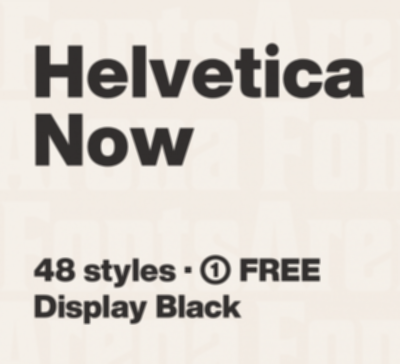

In [38]:
#kernel = np.ones((3,3),np.float32)/25
#kernel = np.float32([[1,1,1],[0,0,0],[-1,-1,-1]])
kernel = 1/9*(np.float32([[1,1,1],[1,1,1],[1,1,1]]))
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

**Sharpen Kernel**

A filter with [-1,-1,-1],[-1,9,-1],[-1,-1,-1] gives a sharpened image. If we use a positive kernel value at the center of the 3 x 3 filter, and negative values elsewhere, we pass a high intensity pixel value in comparison to neighboring pixels.

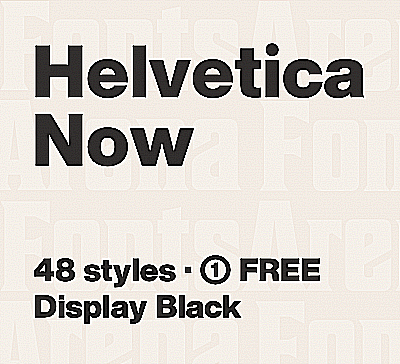

In [45]:
#kernel = np.ones((3,3),np.float32)/25
#kernel = np.float32([[1,1,1],[0,0,0],[-1,-1,-1]])
kernel = (np.float32([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]]))
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

**Identity function**

Identity function is the function which gives the same result after its application.
To get the same image, if we use 1 at the center and 0 elsewhere while convolving, we let the actual image pixel value pass through and we get the same image as the output.

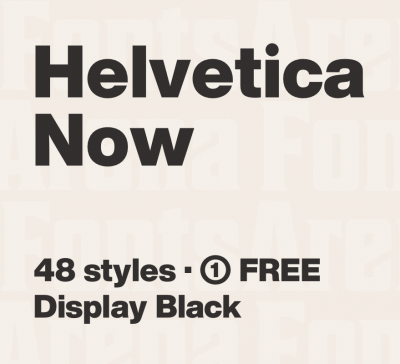

In [46]:
#kernel = np.ones((3,3),np.float32)/25
#kernel = np.float32([[1,1,1],[0,0,0],[-1,-1,-1]])
kernel = (np.float32([[0,0,0],[0,1,0],[0,0,0]]))
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)